In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import dateutil
import seaborn as sns

In [144]:
csv = pd.read_csv('Chicago_Crime_Detective.csv')
df=pd.DataFrame(csv)
df

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012
...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,1/1/01 0:05,STREET,False,False,1123,NaN,NaN,2001
191637,191637,1313404,1/1/01 0:01,STREET,False,False,2023,NaN,NaN,2001
191638,191638,1313442,1/1/01 0:01,STREET,False,False,911,NaN,NaN,2001
191639,191639,1563324,1/1/01 0:01,STREET,False,False,1712,NaN,NaN,2001


In [46]:
np.median(df['Year'])

2006.0

In [107]:
df['Date'].astype('datetime64[ns]').quantile(.5)

Timestamp('2006-05-24 22:00:00')

In [64]:
# df_datetime_format = pd.to_datetime(df['Date'])
# length = len(df_datetime_format)
# sorted(df_datetime_format)[length//2]

In [101]:
# df_datetime_format

NameError: name 'df_datetime_format' is not defined

In [145]:
df['Date'] = pd.to_datetime(df.Date)

In [146]:
df.dtypes

Unnamed: 0                      int64
ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

In [105]:
df['Date'] = df['Date'].apply(dateutil.parser.parse, dayfirst=True)

TypeError: Parser must be a string or character stream, not Timestamp

In [147]:
df['Date']

0        2012-12-31 23:15:00
1        2012-12-31 22:00:00
2        2012-12-31 22:00:00
3        2012-12-31 22:00:00
4        2012-12-31 21:30:00
                 ...        
191636   2001-01-01 00:05:00
191637   2001-01-01 00:01:00
191638   2001-01-01 00:01:00
191639   2001-01-01 00:01:00
191640   2001-01-01 00:01:00
Name: Date, Length: 191641, dtype: datetime64[ns]

In [60]:
df.ID.count()

191641

In [148]:
df.Date.value_counts()

2008-05-16 00:00:00    11
2004-04-13 21:00:00    10
2001-10-17 22:00:00    10
2005-09-17 22:00:00    10
2001-10-26 22:00:00     9
                       ..
2011-09-05 13:00:00     1
2002-09-01 22:45:00     1
2003-12-16 21:55:00     1
2010-10-18 20:00:00     1
2004-08-31 00:20:00     1
Name: Date, Length: 131680, dtype: int64

In [53]:
df.groupby('Date')
df.groupby('Date').groups
# df.groupby('Date').groups.keys()
# df

{Timestamp('2001-01-01 00:01:00'): Int64Index([191637, 191638, 191639, 191640], dtype='int64'),
 Timestamp('2001-01-01 00:05:00'): Int64Index([191634, 191635, 191636], dtype='int64'),
 Timestamp('2001-01-01 00:30:00'): Int64Index([191632, 191633], dtype='int64'),
 Timestamp('2001-01-01 01:17:00'): Int64Index([191631], dtype='int64'),
 Timestamp('2001-01-01 01:50:00'): Int64Index([191630], dtype='int64'),
 Timestamp('2001-01-01 02:00:00'): Int64Index([191629], dtype='int64'),
 Timestamp('2001-01-01 03:00:00'): Int64Index([191627, 191628], dtype='int64'),
 Timestamp('2001-01-01 03:57:00'): Int64Index([191626], dtype='int64'),
 Timestamp('2001-01-01 04:00:00'): Int64Index([191625], dtype='int64'),
 Timestamp('2001-01-01 04:30:00'): Int64Index([191624], dtype='int64'),
 Timestamp('2001-01-01 05:00:00'): Int64Index([191622, 191623], dtype='int64'),
 Timestamp('2001-01-01 08:00:00'): Int64Index([191621], dtype='int64'),
 Timestamp('2001-01-01 09:00:00'): Int64Index([191620], dtype='int64'),


In [149]:
# df['date'] = [d.date() for d in df['Date']]
df['date'] = [d.date() for d in df['Date']]
df['month']=[d.month for d in df['Date']]
df['weekday']=[d.day_name() for d in df.Date]
df['time'] = [d.time() for d in df['Date']]

In [150]:
df

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,date,month,weekday,time
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,2012-12-31,12,Monday,23:15:00
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,2012-12-31,12,Monday,22:00:00
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,2012-12-31,12,Monday,22:00:00
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,2012-12-31,12,Monday,22:00:00
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,2012-12-31,12,Monday,21:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,2001-01-01,1,Monday,00:05:00
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,2001-01-01,1,Monday,00:01:00
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,2001-01-01,1,Monday,00:01:00
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,2001-01-01,1,Monday,00:01:00


In [200]:
df1=df.groupby(['month','Arrest']).ID.count()
# df.Arrest

In [204]:
type(df1)
# df1.filter(lambda x:x['month'].values==1)
# df1['Arrest']
# sns.lineplot(df1.index,df1.ID)
df1
# sns.lineplot(df1.index,df1.values==True)

month  Arrest
1      False     14612
       True       1435
2      False     12273
       True       1238
3      False     14460
       True       1298
4      False     14028
       True       1252
5      False     14848
       True       1187
6      False     14772
       True       1230
7      False     15477
       True       1324
8      False     15243
       True       1329
9      False     14812
       True       1248
10     False     15744
       True       1342
11     False     14807
       True       1256
12     False     15029
       True       1397
Name: ID, dtype: int64

In [154]:
df2=df.groupby('weekday').ID.count()

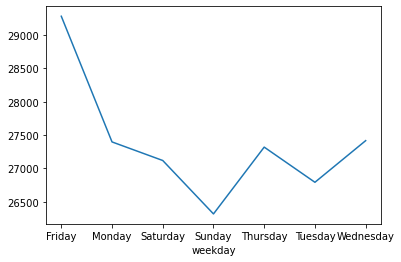

In [205]:
sns.lineplot(df2.index,df2.values)

Year
2001    20669
2002    18753
2003    16657
2004    16862
2005    16484
2006    16098
2007    14280
2008    14445
2009    12167
2010    15497
2011    15637
2012    14092
Name: ID, dtype: int64

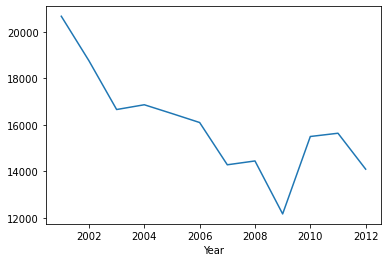

In [211]:
df3=df.groupby('Year').ID.count()
sns.lineplot(df3.index,df3.values)
df3

In [249]:
df4=df.groupby(['Year','Arrest']).ID.count()
df4

Year  Arrest
2001  False     18517
      True       2152
2002  False     16638
      True       2115
2003  False     14859
      True       1798
2004  False     15169
      True       1693
2005  False     14956
      True       1528
2006  False     14796
      True       1302
2007  False     13068
      True       1212
2008  False     13425
      True       1020
2009  False     11327
      True        840
2010  False     14796
      True        701
2011  False     15012
      True        625
2012  False     13542
      True        550
Name: ID, dtype: int64

In [242]:
# type(df4)
s1=0
s2=0
for item in df4.iteritems():
    if item[0][1]==True:
        if item[0][0]<2007:
            s1+=item[1]
        else:
            s2+=item[1]
(s1, s2)

(10588, 4948)

In [251]:
2152/(2152+18517)

0.10411727708161982

In [253]:
1212/(1212+13068)

0.08487394957983194

In [290]:
df5=df.groupby('LocationDescription').ID.count()
df6=df5.sort_values().tail(6)
df6

LocationDescription
DRIVEWAY - RESIDENTIAL              1675
GAS STATION                         2111
ALLEY                               2308
OTHER                               4573
PARKING LOT/GARAGE(NON.RESID.)     14852
STREET                            156564
Name: ID, dtype: int64

In [291]:
s=0
for i in df6.iteritems():
    s+=i[1]
s-=4573
s

177510

In [300]:
df7=df.groupby(['LocationDescription','weekday']).ID.count()
df7=df7['GAS STATION']
df7.sort_values()

weekday
Tuesday      270
Wednesday    273
Monday       280
Thursday     282
Friday       332
Sunday       336
Saturday     338
Name: ID, dtype: int64